In [1]:
import pyerrors as pe
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_test = {'a':[0,1,2,3,4,5],'b':[0,1,2,3,4,5]}
y_test = {'a':[pe.Obs([np.random.normal(i, i*1.5, 1000)],['ensemble1']) for i in range(1,7)],
          'b':[pe.Obs([np.random.normal(val, val*1.5, 1000)],['ensemble1']) for val in [1.0,2.5,4.0,5.5,7.0,8.5]]}
for key in y_test.keys():
    [item.gamma_method() for item in y_test[key]]

In [3]:
def func_a(a, x):
    return a[1] * x + a[0]

def func_b(a, x):
    return a[2] * x + a[0]

funcs_test = {"a": func_a,"b": func_b}

In [4]:
output_test = pe.combined_fits.combined_total_least_squares(x_test,y_test,funcs_test)

Fit with 3 parameters
Optimization terminated successfully.
chisquare/d.o.f.: 0.8434205014773611
fit parameters [1.01510812 0.98190604 1.45453441]


In [5]:
output_test.gamma_method()

In [6]:
print(output_test)

Goodness of fit:
χ²/d.o.f. = 0.843421
Fit parameters:
0	 1.015(32)
1	 0.982(32)
2	 1.455(41)



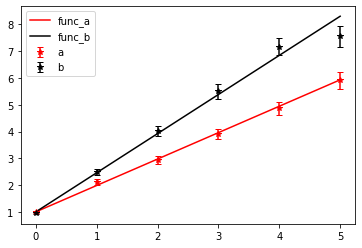

In [7]:
colour= {'a':'red','b':'black'}
plt.figure()
for key in funcs_test.keys():
    plt.errorbar(x_test[key],[o.value for o in y_test[key]],ls='none',marker='*',color=colour[key],yerr=[o.dvalue for o in y_test[key]],capsize=3,label=key)
    plt.plot([x_val for x_val in x_test[key]],[funcs_test[key](output_test.fit_parameters,x_val) for x_val in x_test[key]],color=colour[key],label='func_'+key)
plt.legend()
plt.show()